# Main Library

In [1]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading Images

In [2]:
path = r'Fruit And Vegetable Diseases Dataset'
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',
           'Carrot__Healthy','Carrot__Rotten','Potato__Healthy','Potato__Rotten']

class_labels = ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten',
           'Carrot__Healthy','Carrot__Rotten','Potato__Healthy','Potato__Rotten']



images = []
labels = []

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(path + '/' + folder):
        image = cv2.imread(path + '/' + folder + '/' + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(count)
    count += 1
    
print(len(images)), print(len(labels))

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten
Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Carrot__Healthy
Loading -->  Carrot__Rotten
Loading -->  Potato__Healthy
Loading -->  Potato__Rotten
12568
12568


(None, None)

In [3]:
data = np.array(images).astype('float32')
data = data / 255.0

labels = np.array(labels)

print(data.shape)

(12568, 128, 128, 3)


# Prepare Labels & Shuffle Data

In [4]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

# Show Random Images

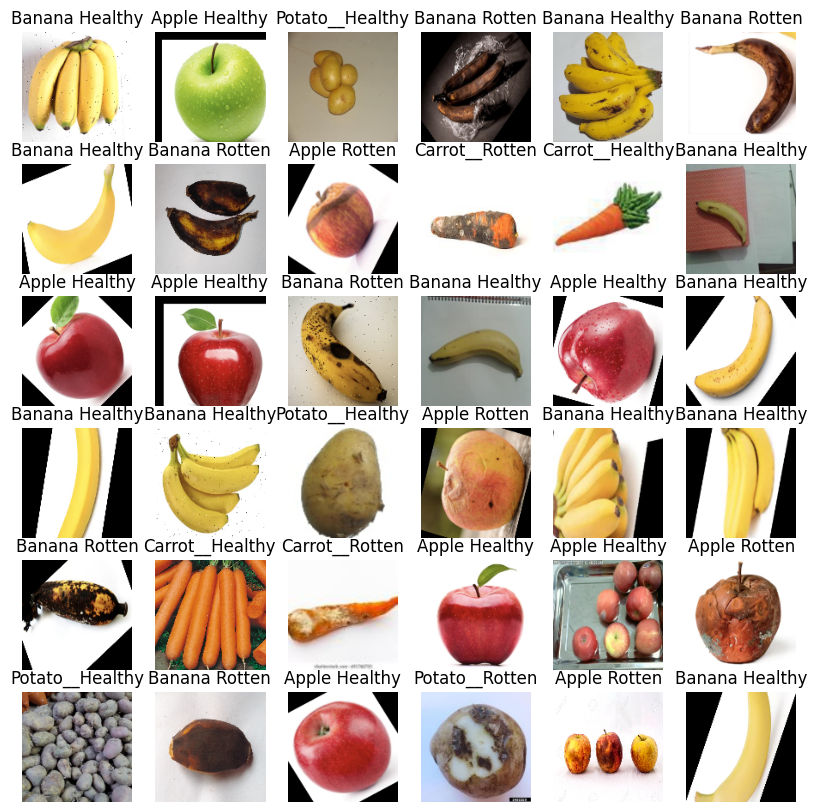

In [5]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

# Splitting Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

# Building Deep Learning Model From Scratch

In [9]:
model = Sequential()

model.add(Conv2D(filters=9, kernel_size=(5, 5), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))

model.add(Dense(8, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 9)    │           684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128, 128, 9)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 42, 42, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 42, 42, 64)     │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,966,196 (7.50 MB)

 Trainable params: 1,966,196 (7.50 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss=k.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 65s 691ms/step - accuracy: 0.3261 - loss: 1.6926 - val_accuracy: 0.6842 - val_loss: 0.8953
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 489ms/step - accuracy: 0.6744 - loss: 0.8990 - val_accuracy: 0.7629 - val_loss: 0.6421
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 477ms/step - accuracy: 0.7727 - loss: 0.6308 - val_accuracy: 0.8278 - val_loss: 0.4815
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 534ms/step - accuracy: 0.8208 - loss: 0.4922 - val_accuracy: 0.8453 - val_loss: 0.4753
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 535ms/step - accuracy: 0.8589 - loss: 0.3941 - val_accuracy: 0.8763 - val_loss: 0.3627
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 471ms/step - accuracy: 0.8813 - loss: 0.3221 - val_accuracy: 0.8775 - val_loss: 0.3487
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - accuracy: 0.9006 - loss: 0.2911 - val_accuracy: 0.9006 - val_loss: 0.2996
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 442ms/step - accuracy: 0.9192 - loss: 0.2332 - val_accu

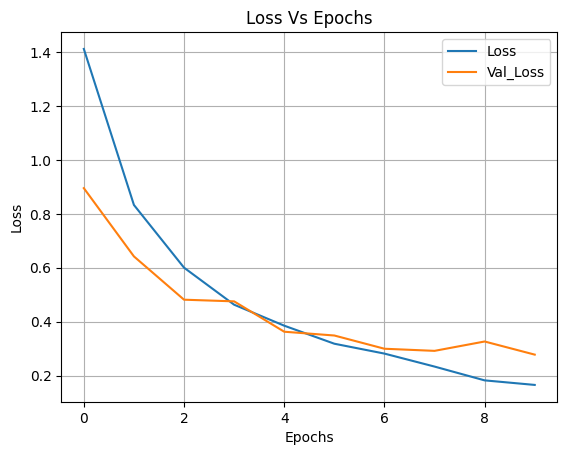

In [11]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

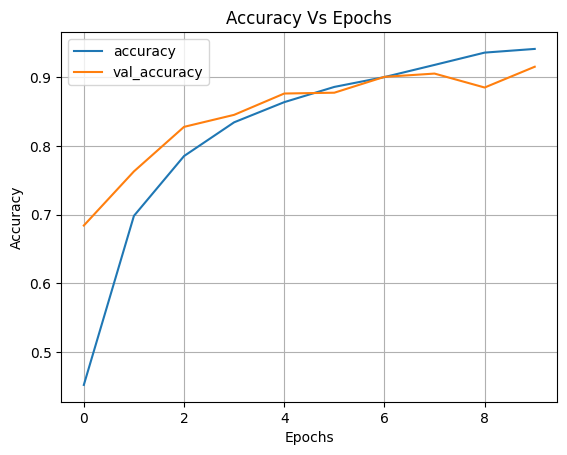

In [12]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


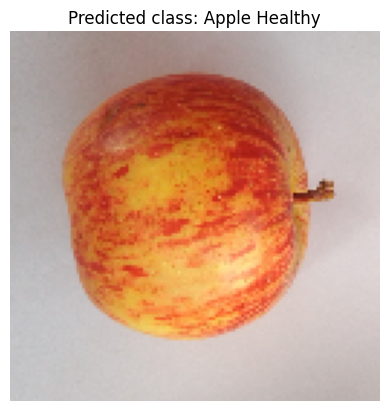

In [19]:
# Load and preprocess the new image
new_img = cv2.imread(r'Fruit And Vegetable Diseases Dataset\Apple__Healthy\FreshApple (20).jpg')
new_img_resized = cv2.resize(new_img, (128, 128))
img_input = new_img_resized.astype('float32') / 255.0
img_input = np.expand_dims(img_input, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_input)
predicted_class = prediction.argmax(axis=1)[0]

# Display image and predicted class
plt.imshow(cv2.cvtColor(new_img_resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

In [20]:
model.save('fruit_vegetable_disease_model.keras')